<font size="6">Project Proposal: Predicting Quality of Wine </font>

<font size="5">Introduction</font>

In this project, we found a large data set pertaining to the quality of different wines. It had 13 columns, 11 of which were factors in predicting the quality of different wines. From there, we researched what gives certain wines specific properties that make them high in quality as compared to low. The quality of wine can be a factor in its cost and thus is an important measurement for sellers and buyers. It is known that volatile acidity, total sulfur dioxide and chlorides are three factors that play the largest role in determining the quality of wine. Thus, this project will analyze these factors and develop a system for predicting quality based off of just these three qualifiers in an attemp to make a system adept to determining the value of batches of wine.

<font size="3">Question:</font> blah?

The data set "Wine Quality" can be found at https://www.kaggle.com/datasets/rajyellow46/wine-quality, and displays a number of measurable factors of wines as well as the quality rating of each wine including but not limited to Volatile Acidity, Chlorides, Sulfur Dioxide.

In [174]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

In [173]:
wine_quality <- read_csv(file = "/home/jovyan/dsci-project/DSCI-Project/winequalityN.csv", 
                         make.names(colnames(wine_quality)))

white_quality <- filter(wine_quality, type == "white") |>
                select(volatile.acidity, chlorides, total.sulfur.dioxide, quality) |>
                na.omit(volatile.acidity, chlorides, total.sulfur.dioxide, quality)
white_quality$volatile.acidity <- as.numeric(white_quality$volatile.acidity)
white_quality$chlorides<-as.numeric(white_quality$chlorides)
white_quality$total.sulfur.dioxide<-as.numeric(white_quality$total.sulfur.dioxide)
white_quality$quality<-as.numeric(white_quality$quality)

Rows: 6498 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): type, fixed.acidity, volatile.acidity, citric.acid, residual.sugar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [168]:
wine_split <- initial_split(white_quality, prop = 0.75, strata = quality)
wine_train <- training (wine_split)
wine_test <- testing(wine_split)

In [169]:
#summarize with training data

In [170]:
wine_table <- wine_train|>
    group_by(quality)|>           
    summarize(mean.vol = mean(volatile.acidity), mean.chlor = mean(chlorides), mean.sulf = mean(total.sulfur.dioxide))

wine_table

quality,mean.vol,mean.chlor,mean.sulf
<dbl>,<dbl>,<dbl>,<dbl>
3,0.3712500,0.06300000,168.4167
4,0.3765289,0.05065289,127.8967
5,0.3039534,0.05136197,151.8661
6,0.2597447,0.04506261,136.8006
7,0.2618028,0.03832512,125.5262
8,0.2760072,0.03751799,125.3129
9,0.2980000,0.02740000,116.0000


In [171]:
#plot with training data

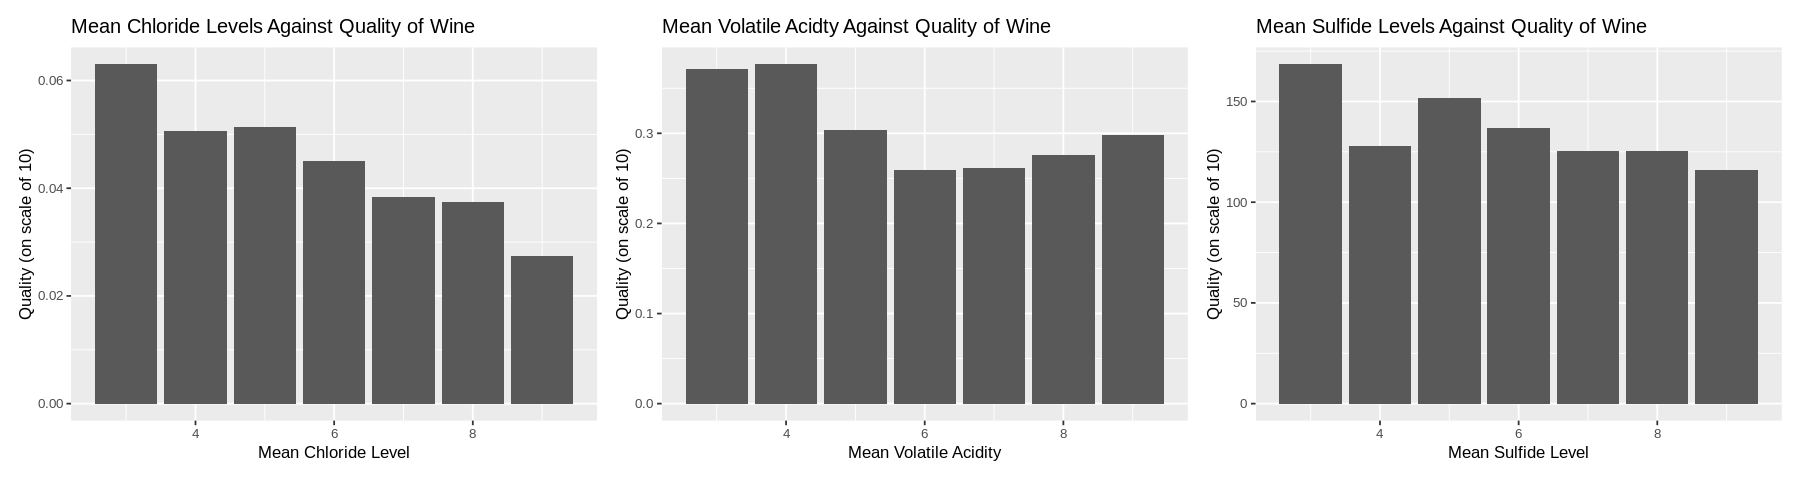

In [172]:
library(ggplot2)
library(patchwork)

options(repr.plot.height = 4, repr.plot.width = 15)
plot_wine_vol <- wine_table |>
                    ggplot(aes(x= quality, y=mean.vol))+
                           geom_bar(stat = "identity") +
                           labs(x = "Mean Volatile Acidity", y = "Quality (on scale of 10)", 
                                title = "Mean Volatile Acidty Against Quality of Wine")+
                                theme(text = element_text(size = 10))
                        

plot_wine_chlor <- wine_table |>
                    ggplot(aes(x= quality, y=mean.chlor))+
                           geom_bar(stat = "identity") +
                           labs(x = "Mean Chloride Level", y = "Quality (on scale of 10)", 
                                title = "Mean Chloride Levels Against Quality of Wine")+
                                theme(text = element_text(size = 10))
plot_wine_sulf <- wine_table |>
                    ggplot(aes(x= quality, y=mean.sulf))+
                           geom_bar(stat = "identity") +
                           labs(x = "Mean Sulfide Level", y = "Quality (on scale of 10)", 
                                title = "Mean Sulfide Levels Against Quality of Wine")+
                                theme(text = element_text(size = 10))
                            
plot_wine_chlor+plot_wine_vol+plot_wine_sulf

<font size="5">Methods</font>